# Importando a Base e Definição do DataFrame


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dados = pd.read_csv('TB_RH.csv', sep =';')
dados.head()

,cod_vinculo,nome,sigla,instituicao,lotacao,municipio,cargo,dt_inicio,dt_fim,regime,quadro_funcional,quadro_funcional_desc,tipo_cargo,situacao,ult_remu_bruta,genero,ano_nasc,atualizado
0,306548,MARCOS APARECIDO DO NASCIMENTO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST SAO PEDRO E SAO PAULO,CAMPO LARGO,DOCENTE POR PRAZO DETERMINADO,2012-02-01,2012-04-09,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,M,1968,2016-07-27
1,263365,MARCOS APARECIDO DO NASCIMENTO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST JOSE RIBAS VIDAL EF,CAMPO LARGO,DOCENTE POR PRAZO DETERMINADO,2013-02-04,2013-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,M,1968,2016-07-27
2,279448,MARCOS APARECIDO DO NASCIMENTO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST DARLEI ADAD EF,CAMPO LARGO,DOCENTE POR PRAZO DETERMINADO,2014-02-03,2014-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,M,1968,2016-07-27
3,370188,MARCOS APARECIDO DO NASCIMENTO,SEED,SECRETARIA DA EDUCAÇÃO,E M ZILDA ARNS NEUMANN-EI EF MOD ED ESP,BALSA NOVA,DOCENTE POR PRAZO DETERMINADO,2016-02-22,2016-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,M,1968,2017-02-01
4,489667,MARCOS APARECIDO DO NASCIMENTO,UEM,UNIVERSIDADE ESTADUAL DE MARINGA,DIVISAO DE APOIO,MARINGA,AG. UNIVERSITARIO OPERACIONAL,2002-10-07,NaN,ESTATUTÁRIO,IEES,MAGISTÉRIO SUPERIOR,EFETIVO,ATIVO,6280.09,M,1971,2019-12-01


#Explorando os tipos


In [3]:
tipo_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipo de Dados'])
tipo_de_dados.columns.name = 'Variáveis'
tipo_de_dados

Variáveis,Tipo de Dados
cod_vinculo,int64
nome,object
sigla,object
instituicao,object
lotacao,object
municipio,object
cargo,object
dt_inicio,object
dt_fim,object
regime,object


In [4]:
dados.shape

(666801, 18)

In [5]:
print('O arquivo disponibilizado possui {} registros' .format(dados.shape[0]))

O arquivo disponibilizado possui 666801 registros


#Relatório de Análise

## Organizando Visualização

## Filtrando somente servidores ativos

In [0]:
situacao  = ['ATIVO']

In [7]:
dados.situacao.isin(situacao).head(10)

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7    False
8    False
9    False
Name: situacao, dtype: bool

In [8]:
selecao = dados.situacao.isin(situacao)
selecao

0         False
1         False
2         False
3         False
4          True
          ...  
666796    False
666797    False
666798     True
666799    False
666800     True
Name: situacao, Length: 666801, dtype: bool

In [9]:
dados_ativo = dados[selecao]
dados_ativo.head()

,cod_vinculo,nome,sigla,instituicao,lotacao,municipio,cargo,dt_inicio,dt_fim,regime,quadro_funcional,quadro_funcional_desc,tipo_cargo,situacao,ult_remu_bruta,genero,ano_nasc,atualizado
4,489667,MARCOS APARECIDO DO NASCIMENTO,UEM,UNIVERSIDADE ESTADUAL DE MARINGA,DIVISAO DE APOIO,MARINGA,AG. UNIVERSITARIO OPERACIONAL,2002-10-07,NaN,ESTATUTÁRIO,IEES,MAGISTÉRIO SUPERIOR,EFETIVO,ATIVO,6280.09,M,1971,2019-12-01
5,280179,MARCOS APARECIDO DO NASCIMENTO BERNARDO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST ARTHUR RAMOS,ENGENHEIRO BELTRAO,AGENTE EDUCACIONAL I,2007-06-29,NaN,ESTATUTÁRIO,QFEB,EDUCAÇÃO BÁSICA,EFETIVO,ATIVO,4926.11,M,1970,2019-12-01
6,18822,MARCOS APARECIDO GIORGINI GALDINO,SEED,SECRETARIA DA EDUCAÇÃO,CEAD-SARANDI,SARANDI,AGENTE EDUCACIONAL II,2010-03-23,NaN,ESTATUTÁRIO,QFEB,EDUCAÇÃO BÁSICA,EFETIVO,ATIVO,5777.95,M,1967,2019-12-01
11,681871,MARCOS APARECIDO MARQUES,SESP,Secretaria da Segurança Pública e Administraçã...,DEPARTAMENTO PENITENCIARIO - DEPEN,CURITIBA,FUNÇÃO DE GESTÃO PÚBLICA,2019-05-01,NaN,ESTATUTÁRIO,FGP,GESTÃO PÚBLICA,EFETIVO,ATIVO,6088.76,M,1977,2019-12-01
12,400668,MARCOS APARECIDO MARQUES,SESP,Secretaria da Segurança Pública e Administraçã...,PENIT EST DE FOZ DO IGUACU-PEF,FOZ DO IGUACU,AGENTE PENITENCIÁRIO,2008-04-07,NaN,ESTATUTÁRIO,QPPE,QUADRO GERAL,EFETIVO,ATIVO,6130.43,M,1977,2019-12-01


In [10]:
servidor_mais_velho = dados_ativo.ano_nasc.idxmin()
dados_ativo.loc[servidor_mais_velho]

cod_vinculo                                                         648910
nome                                                    CARLOS EHLKE BRAGA
sigla                                                                  DER
instituicao              DEPARTAMENTO DE ESTRADAS DE RODAGEM DO ESTADO ...
lotacao                                             DIRETORIA DE OPERACOES
municipio                                                         CURITIBA
cargo                                             CARGO EM COMISSÃO - 01-C
dt_inicio                                                       2019-01-03
dt_fim                                                                 NaN
regime                                                         ESTATUTÁRIO
quadro_funcional                                             COMISSIONADOS
quadro_funcional_desc                                        COMISSIONADOS
tipo_cargo                                                     EM COMISSÃO
situacao                 

In [11]:
servidor_mais_novo = dados_ativo.ano_nasc.idxmax()
dados_ativo.loc[servidor_mais_novo]

cod_vinculo                                                646454
nome                                            TALITA GARCIA BAI
sigla                                                    UNIOESTE
instituicao              UNIVERSIDADE ESTADUAL DO OESTE DO PARANA
lotacao                                             FOZ DO IGUACU
municipio                                           FOZ DO IGUACU
cargo                              APRENDIZ - ASSISTENTE ADMINIST
dt_inicio                                              2018-10-15
dt_fim                                                        NaN
regime                                                        CLT
quadro_funcional                                             IEES
quadro_funcional_desc                         MAGISTÉRIO SUPERIOR
tipo_cargo                                                   ****
situacao                                                    ATIVO
ult_remu_bruta                                             803.15
genero    

In [12]:
dados_ativo.index = range(dados_ativo.shape[0])
dados_ativo

,cod_vinculo,nome,sigla,instituicao,lotacao,municipio,cargo,dt_inicio,dt_fim,regime,quadro_funcional,quadro_funcional_desc,tipo_cargo,situacao,ult_remu_bruta,genero,ano_nasc,atualizado
0,489667,MARCOS APARECIDO DO NASCIMENTO,UEM,UNIVERSIDADE ESTADUAL DE MARINGA,DIVISAO DE APOIO,MARINGA,AG. UNIVERSITARIO OPERACIONAL,2002-10-07,NaN,ESTATUTÁRIO,IEES,MAGISTÉRIO SUPERIOR,EFETIVO,ATIVO,6280.09,M,1971,2019-12-01
1,280179,MARCOS APARECIDO DO NASCIMENTO BERNARDO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST ARTHUR RAMOS,ENGENHEIRO BELTRAO,AGENTE EDUCACIONAL I,2007-06-29,NaN,ESTATUTÁRIO,QFEB,EDUCAÇÃO BÁSICA,EFETIVO,ATIVO,4926.11,M,1970,2019-12-01
2,18822,MARCOS APARECIDO GIORGINI GALDINO,SEED,SECRETARIA DA EDUCAÇÃO,CEAD-SARANDI,SARANDI,AGENTE EDUCACIONAL II,2010-03-23,NaN,ESTATUTÁRIO,QFEB,EDUCAÇÃO BÁSICA,EFETIVO,ATIVO,5777.95,M,1967,2019-12-01
3,681871,MARCOS APARECIDO MARQUES,SESP,Secretaria da Segurança Pública e Administraçã...,DEPARTAMENTO PENITENCIARIO - DEPEN,CURITIBA,FUNÇÃO DE GESTÃO PÚBLICA,2019-05-01,NaN,ESTATUTÁRIO,FGP,GESTÃO PÚBLICA,EFETIVO,ATIVO,6088.76,M,1977,2019-12-01
4,400668,MARCOS APARECIDO MARQUES,SESP,Secretaria da Segurança Pública e Administraçã...,PENIT EST DE FOZ DO IGUACU-PEF,FOZ DO IGUACU,AGENTE PENITENCIÁRIO,2008-04-07,NaN,ESTATUTÁRIO,QPPE,QUADRO GERAL,EFETIVO,ATIVO,6130.43,M,1977,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168197,7683,MARCOS APARECIDO BATISTA,SESP,Secretaria da Segurança Pública e Administraçã...,AJ GER COMPANHIA DE COMANDO E SERVICOS,CURITIBA,3º. SARGENTO,1997-05-22,NaN,ESTATUTÁRIO,PM,POLÍCIA MILITAR,EFETIVO,ATIVO,5923.99,M,1977,2019-12-01
168198,639498,MARCOS APARECIDO CALIXTO,SESP,Secretaria da Segurança Pública e Administraçã...,DEPEN-CARCERAGEM LOANDA,LOANDA,PROFISSIONAL DE NÍVEL MÉDIO,2018-07-21,NaN,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,ATIVO,3024.16,M,1975,2019-12-01
168199,66988,MARCOS APARECIDO CARRASCOZZO,SESP,Secretaria da Segurança Pública e Administraçã...,DECIMO BATALHAO DE POLICIA MILITAR,APUCARANA,1º. SARGENTO,1996-01-24,NaN,ESTATUTÁRIO,PM,POLÍCIA MILITAR,EFETIVO,ATIVO,9620.88,M,1972,2019-12-01
168200,652992,MARCOS APARECIDO CASTELHAO,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST PARANA,LOANDA,DOCENTE POR PRAZO DETERMINADO,2019-02-11,NaN,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,ATIVO,0.00,M,1982,2019-08-01


In [13]:
dados_ordenados = dados_ativo.sort_values( by = ['ult_remu_bruta', 'quadro_funcional'])
dados_ordenados


,cod_vinculo,nome,sigla,instituicao,lotacao,municipio,cargo,dt_inicio,dt_fim,regime,quadro_funcional,quadro_funcional_desc,tipo_cargo,situacao,ult_remu_bruta,genero,ano_nasc,atualizado
2603,504025,MARIA AUGUSTA NOGUEIRA SCHWAB,EMATER,INSTITUTO PARANAENSE DE ASSISTÊNCIA TÉCNICA E ...,ESCR. LOCAL DE MAMBORE,CURITIBA,ASSIST. ADMINISTRATIVO,1976-09-01,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,0.00,F,1976,2016-07-27
3617,581306,MARIA DE FATIMA DE BRITO ROMANO,SESP,Secretaria da Segurança Pública e Administraçã...,DEPARTAMENTO EXEC PENAL-DEPEN,CURITIBA,PAGAMENTO EVENTUAL,2017-11-01,NaN,ESTATUTÁRIO,ADM. INDIRETA,ADM. INDIRETA,EFETIVO,ATIVO,0.00,F,1960,2017-12-06
4145,580776,MARIA DIAS DA COSTA,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST MACHADO DE ASSIS,TUNEIRAS DO OESTE,PAGAMENTO UNICO,2019-07-15,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,0.00,F,1952,2019-08-01
4209,489433,ALTAIR DO PRADO,PREDUC,PARANÁ EDUCAÇÃO,COL EST DUQUE DE CAXIAS 1/2GRS,SAUDADE DO IGUACU,AUXILIAR DE SERVICOS GERAIS -,1999-01-25,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,0.00,F,1958,2018-10-02
4409,486727,MARIA EDUARDA BRANDAO BUENO,UEL,UNIVERSIDADE ESTADUAL DE LONDRINA,HU-DC-RF,LONDRINA,CARGO EM COMISSÃO,2014-03-06,NaN,OUTROS,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,0.00,F,1991,2016-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68276,652568,JOAO PAULO RIBEIRO SANTANA,APPA,ADMINISTRAÇÃO DOS PORTOS DE PARANAGUÁ E ANTONINA,DIRETORIA DE MEIO AMBIENTE,PARANAGUA,DIRETOR DE MEIO AMBIENTE,2019-01-16,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,62815.76,M,1981,2019-12-06
90287,655862,LUIZ TEIXEIRA DA SILVA JUNIOR,APPA,ADMINISTRAÇÃO DOS PORTOS DE PARANAGUÁ E ANTONINA,DIRETORIA DE OPERAÇÕES PORTUÁRIAS,PARANAGUA,DIRETOR DE OPERACOES PORTUARIA,2019-01-29,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,62815.76,M,1949,2019-12-06
115325,652571,ANDRE LUIZ PIOLI BERNASCKI,APPA,ADMINISTRAÇÃO DOS PORTOS DE PARANAGUÁ E ANTONINA,DIRETORIA DE DESENVOLVIMENTO EMPRESARIAL,PARANAGUA,DIRETOR DE DESENV. EMPRESARIAL,2019-01-16,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,62815.76,M,1978,2019-12-06
89718,652570,LUIZ FERNANDO GARCIA DA SILVA,APPA,ADMINISTRAÇÃO DOS PORTOS DE PARANAGUÁ E ANTONINA,PRESIDÊNCIA,PARANAGUA,DIRETOR PRESIDENTE,2019-01-09,NaN,CLT,ADM. INDIRETA,ADM. INDIRETA,****,ATIVO,64589.56,M,1984,2019-12-06


In [14]:
dados_ativo.sigla.value_counts()

SEED       99176
SESP       29085
SESA        7727
UEL         5329
UEM         3942
           ...  
CPRA           5
SEET           2
FAFI-UV        2
FAFICOP        1
SETI           1
Name: sigla, Length: 73, dtype: int64

In [15]:
dados_ativo.regime.unique()

array(['ESTATUTÁRIO', 'CLT', 'TEMPORÁRIO', 'CRES', 'OUTROS'], dtype=object)

In [16]:
dados_ativo.regime.value_counts() 


ESTATUTÁRIO    133214
TEMPORÁRIO      27330
CLT              4656
CRES             1945
OUTROS           1057
Name: regime, dtype: int64

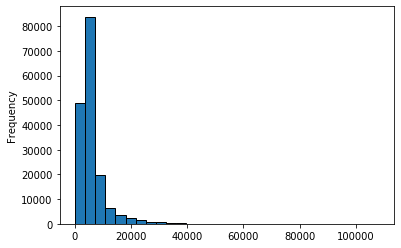

In [24]:
dados_ativo['ult_remu_bruta'].plot.hist(bins = 30, edgecolor='black')

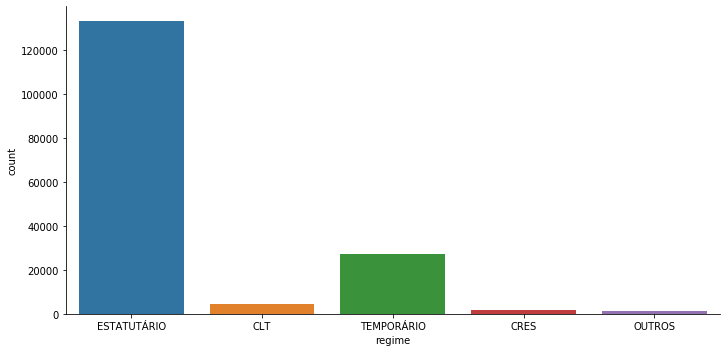

In [25]:
sns.catplot(x = "regime", data = dados_ativo, kind="count", aspect=2)


In [26]:
medias_por_departamento = dados_ativo.groupby('sigla').mean()['ult_remu_bruta']
medias_por_departamento.head(5)

sigla
ADAPAR          8356.056591
AGEPAR          9224.208947
AGUASPARANA    10918.150260
APPA            8902.678282
BPP            10310.974615
Name: ult_remu_bruta, dtype: float64

ValueError: ignored

<Figure size 3600x432 with 0 Axes>

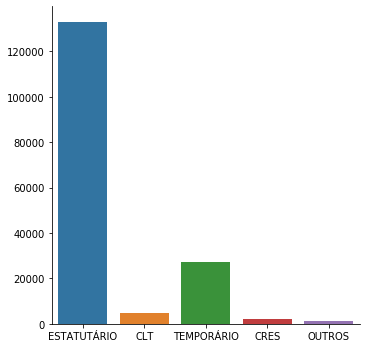

In [27]:
plt.figure(figsize=(50, 6))
sns.catplot(data= dados_ativo, x = dados_ativo.regime , kind='count')

# Salários


In [28]:
selecao_comissionados = dados_ativo.regime == 'OUTROS'
qtd_comissao = dados_ativo[selecao_comissionados]
qtd_comissao['ult_remu_bruta'].describe()

count     1057.000000
mean      3279.800161
std       4996.023809
min          0.000000
25%          0.000000
50%       3330.430000
75%       3430.430000
max      43966.850000
Name: ult_remu_bruta, dtype: float64

In [29]:
selecao_estatutario = dados_ativo.regime == 'ESTATUTÁRIO'
qtd_estatutario = dados_ativo[selecao_estatutario]
qtd_estatutario['ult_remu_bruta'].describe()

count    133214.000000
mean       6616.306697
std        4691.411747
min           0.000000
25%        3968.030000
50%        5311.430000
75%        7182.640000
max      108303.480000
Name: ult_remu_bruta, dtype: float64

In [30]:
servidor_sortudo = qtd_estatutario['ult_remu_bruta'].idxmax()
dados_ativo.loc[servidor_sortudo]

cod_vinculo                                                         432303
nome                                                       JOICE MALAKOSKI
sigla                                                                 SESP
instituicao              Secretaria da Segurança Pública e Administraçã...
lotacao                            INSTITUTO DE CRIMINALISTICA DE CURITIBA
municipio                                                         CURITIBA
cargo                                                       PERITO OFICIAL
dt_inicio                                                       1995-03-28
dt_fim                                                                 NaN
regime                                                         ESTATUTÁRIO
quadro_funcional                                                      QPPO
quadro_funcional_desc                                     PERITOS OFICIAIS
tipo_cargo                                                         EFETIVO
situacao                 

In [31]:
servidor_max = qtd_comissao['ult_remu_bruta'].idxmax()
dados_ativo.loc[servidor_max]

cod_vinculo                                      542704
nome                     FELIPE JOSE VIDIGAL DOS SANTOS
sigla                                            PRPREV
instituicao                           PARANAPREVIDÊNCIA
lotacao                                            PRES
municipio                                      CURITIBA
cargo                                DIRETOR-PRESIDENTE
dt_inicio                                    2019-02-21
dt_fim                                              NaN
regime                                           OUTROS
quadro_funcional                          ADM. INDIRETA
quadro_funcional_desc                     ADM. INDIRETA
tipo_cargo                                         ****
situacao                                          ATIVO
ult_remu_bruta                                  43966.8
genero                                                M
ano_nasc                                           1951
atualizado                                   201

In [32]:
selecao_estatutario_maior_20 = (dados_ativo.regime == 'ESTATUTÁRIO') & (dados_ativo['ult_remu_bruta'] > 20000 )
qtd_estatutario = dados_ativo[selecao_estatutario_maior_20].shape[0]
qtd_estatutario

3726

In [33]:
selecao_outros_maior_20 = (dados_ativo.regime == 'OUTROS') & (dados_ativo['ult_remu_bruta'] > 20000 )
qtd_estatutario = dados_ativo[selecao_outros_maior_20].shape[0]
qtd_estatutario

27

In [34]:
selecao_sexof_maior_20 = (dados_ativo.genero == 'F') & (dados_ativo.sigla =='SEED') & (dados_ativo['ult_remu_bruta'] > 20000 )
qtd_sexof = dados_ativo[selecao_sexof_maior_20].shape[0]
print('{} mulheres que ganham acima de 20 mil '.format(qtd_sexof))

34 mulheres que ganham acima de 20 mil 


In [35]:
selecao_sexom_maior_20 = (dados_ativo.genero == 'M') & (dados_ativo.sigla =='SEED') & (dados_ativo['ult_remu_bruta'] > 20000 )
qtd_sexom = dados_ativo[selecao_sexom_maior_20].shape[0]
print('{} homens que ganham acima de 20 mil '.format(qtd_sexom))

4 homens que ganham acima de 20 mil 


In [36]:
mulheres_comissionadas = (dados_ativo.genero == 'F') & (dados_ativo.cargo == 'CARGO EM COMISSÃO') & (dados_ativo['ult_remu_bruta'] > 0000 )
qtd_fem_com = dados_ativo[mulheres_comissionadas].shape[0]  
print('{} mulheres comissionadas'.format(qtd_fem_com))

337 mulheres comissionadas


In [37]:
hm_comissionadas = (dados_ativo.genero == 'M') & (dados_ativo.cargo == 'CARGO EM COMISSÃO')
qtd_hm_com = dados_ativo[hm_comissionadas].shape[0]  
print('{} homens comissionados'.format(qtd_hm_com))

300 homens comissionados


In [38]:
total = (dados_ativo.cargo == 'CARGO EM COMISSÃO')
total_com = dados_ativo[total].shape[0]  
print('{}  comissionadas'.format(total_com))

834  comissionadas


In [39]:
pd.pivot_table(dados_ativo, index= ["regime", "genero"], values="ult_remu_bruta",aggfunc=[np.count_nonzero,np.mean],margins=False)

count_nonzero           mean
                   ult_remu_bruta ult_remu_bruta
regime      genero                              
CLT         F              1837.0    5752.896459
            M              2650.0   11416.513236
CRES        F              1099.0    5146.008702
            M               804.0    5200.241390
ESTATUTÁRIO F             77808.0    6158.943852
            M             55080.0    7262.616303
OUTROS      F               459.0    2852.563298
            M               286.0    3992.940480
TEMPORÁRIO  F             17450.0    2205.823375
            M              7450.0    2328.830321

In [40]:
dados_ativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168202 entries, 0 to 168201
Data columns (total 18 columns):
cod_vinculo              168202 non-null int64
nome                     168202 non-null object
sigla                    168202 non-null object
instituicao              168202 non-null object
lotacao                  168143 non-null object
municipio                168202 non-null object
cargo                    168202 non-null object
dt_inicio                168202 non-null object
dt_fim                   0 non-null object
regime                   168202 non-null object
quadro_funcional         168202 non-null object
quadro_funcional_desc    168202 non-null object
tipo_cargo               168202 non-null object
situacao                 168202 non-null object
ult_remu_bruta           168202 non-null float64
genero                   168202 non-null object
ano_nasc                 168202 non-null int64
atualizado               168202 non-null object
dtypes: float64(1), int64(2), o